In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,MinMaxScaler
from imblearn.over_sampling import SMOTE
from category_encoders.target_encoder import TargetEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import optuna
from optuna import Trial
from imblearn.combine import SMOTEENN
from collections import Counter

from imblearn.over_sampling import BorderlineSMOTE
from scipy.stats import uniform, randint
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import RandomForestClassifier , AdaBoostClassifier , GradientBoostingClassifier , ExtraTreesClassifier , VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV , cross_val_score , StratifiedKFold , learning_curve

c:\Users\abeta\anaconda3\envs\forcompe\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
df = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")
sample_sub = pd.read_csv("sample_submission.csv")
df_ = df.copy()

# EDA

In [3]:
pd.options.display.max_info_columns
df.info(verbose=True)


pd.set_option('display.max_info_columns', 1000) 
pd.set_option('display.max_columns', 1000) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171202 entries, 0 to 171201
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   171202 non-null  int64  
 1   TARGET                       171202 non-null  int64  
 2   NAME_CONTRACT_TYPE           171202 non-null  object 
 3   CODE_GENDER                  171202 non-null  object 
 4   FLAG_OWN_CAR                 136961 non-null  object 
 5   FLAG_OWN_REALTY              136961 non-null  object 
 6   CNT_CHILDREN                 171202 non-null  int64  
 7   AMT_INCOME_TOTAL             171202 non-null  float64
 8   AMT_CREDIT                   171202 non-null  float64
 9   AMT_ANNUITY                  171196 non-null  float64
 10  AMT_GOODS_PRICE              171039 non-null  float64
 11  NAME_TYPE_SUITE              170455 non-null  object 
 12  NAME_INCOME_TYPE             171202 non-null  object 
 13 

In [5]:
intcolumns = df_.select_dtypes("int").columns
floatcolumns = df_.select_dtypes("float").columns
df[intcolumns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171202 entries, 0 to 171201
Data columns (total 20 columns):
 #   Column                       Non-Null Count   Dtype
---  ------                       --------------   -----
 0   SK_ID_CURR                   171202 non-null  int64
 1   TARGET                       171202 non-null  int64
 2   CNT_CHILDREN                 171202 non-null  int64
 3   DAYS_BIRTH                   171202 non-null  int64
 4   DAYS_EMPLOYED                171202 non-null  int64
 5   DAYS_ID_PUBLISH              171202 non-null  int64
 6   FLAG_MOBIL                   171202 non-null  int64
 7   FLAG_EMP_PHONE               171202 non-null  int64
 8   FLAG_WORK_PHONE              171202 non-null  int64
 9   FLAG_CONT_MOBILE             171202 non-null  int64
 10  FLAG_PHONE                   171202 non-null  int64
 11  FLAG_EMAIL                   171202 non-null  int64
 12  REGION_RATING_CLIENT         171202 non-null  int64
 13  REGION_RATING_CLIENT_W_CITY  

In [59]:
df[floatcolumns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171202 entries, 0 to 171201
Data columns (total 20 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   AMT_INCOME_TOTAL            171202 non-null  float64
 1   AMT_CREDIT                  171202 non-null  float64
 2   AMT_ANNUITY                 171196 non-null  float64
 3   AMT_GOODS_PRICE             171039 non-null  float64
 4   REGION_POPULATION_RELATIVE  171202 non-null  float64
 5   DAYS_REGISTRATION           171202 non-null  float64
 6   OWN_CAR_AGE                 58210 non-null   float64
 7   CNT_FAM_MEMBERS             171200 non-null  float64
 8   EXT_SOURCE_1                52274 non-null   float64
 9   EXT_SOURCE_2                170833 non-null  float64
 10  EXT_SOURCE_3                116616 non-null  float64
 11  OBS_30_CNT_SOCIAL_CIRCLE    170642 non-null  float64
 12  DEF_30_CNT_SOCIAL_CIRCLE    170642 non-null  float64
 13  OBS_60_CNT_SOC

In [60]:
df.tail(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
171197,171197,0,Cash loans,M,NaN,NaN,0,83250.0,404325.0,20772.0,337500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.031329,-20529,-3059,-11581.0,-3689,21.0,1,1,1,1,0,0,Laborers,2.0,2,2,0,0,0,0,1,1,Agriculture,NaN,0.404560,0.768808,0.0,0.0,0.0,0.0,-2341.0,0.0,0.0,1.0,0.0
171198,171198,0,Cash loans,F,Y,Y,0,247500.0,601470.0,29065.5,450000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010006,-22083,-129,-4629.0,-1773,1.0,1,1,0,1,0,0,Cooking staff,1.0,2,1,0,0,0,0,0,0,Industry: type 3,NaN,0.608542,NaN,0.0,0.0,0.0,0.0,-1688.0,0.0,0.0,1.0,5.0
171199,171199,0,Cash loans,F,N,N,2,292500.0,1237684.5,49216.5,1138500.0,Unaccompanied,State servant,Higher education,Married,House / apartment,0.006629,-11053,-2536,-4858.0,-3393,NaN,1,1,0,1,0,1,Core staff,4.0,2,2,0,0,0,0,0,0,School,NaN,0.664305,0.758393,2.0,1.0,2.0,1.0,-515.0,0.0,0.0,0.0,1.0
171200,171200,0,Cash loans,M,Y,N,0,112500.0,239850.0,25186.5,225000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,0.009657,-8505,-165,-3318.0,-1176,7.0,1,1,0,1,0,0,Sales staff,1.0,2,2,0,0,0,1,1,0,Business Entity Type 3,0.210918,0.627050,NaN,0.0,0.0,0.0,0.0,-1133.0,NaN,NaN,NaN,NaN
171201,171201,0,Cash loans,F,NaN,NaN,0,108000.0,161730.0,8595.0,135000.0,Family,Working,Secondary / secondary special,Single / not married,House / apartment,0.007305,-17925,-5209,-2411.0,-1473,NaN,1,1,1,1,1,0,Core staff,1.0,3,3,0,0,0,0,0,0,Kindergarten,NaN,0.517986,0.382502,0.0,0.0,0.0,0.0,-220.0,0.0,0.0,0.0,1.0


In [61]:
df_.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,Cash loans,F,N,N,0,112500.0,755190.0,36328.5,675000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.010032,-9233,-878,-333.0,-522,NaN,1,1,1,1,0,0,Core staff,2.0,2,2,0,1,1,0,1,1,School,NaN,0.372591,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN
1,1,0,Cash loans,F,N,Y,0,225000.0,585000.0,16893.0,585000.0,Unaccompanied,Pensioner,Secondary / secondary special,Married,House / apartment,0.008019,-20148,365243,-4469.0,-3436,NaN,1,0,0,1,0,0,NaN,2.0,2,2,0,0,0,0,0,0,XNA,NaN,0.449567,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0
2,2,0,Cash loans,F,N,Y,0,54000.0,334152.0,18256.5,270000.0,Family,State servant,Secondary / secondary special,Married,House / apartment,0.004960,-18496,-523,-3640.0,-2050,NaN,1,1,1,1,1,0,Core staff,2.0,2,2,0,0,0,0,0,0,Postal,NaN,0.569503,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN
3,3,0,Cash loans,F,N,Y,0,67500.0,152820.0,8901.0,135000.0,Children,Pensioner,Lower secondary,Widow,House / apartment,0.005002,-24177,365243,-4950.0,-3951,NaN,1,0,0,1,1,0,NaN,1.0,3,3,0,0,0,0,0,0,XNA,NaN,0.105235,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4,1,Cash loans,M,N,N,0,157500.0,271066.5,21546.0,234000.0,Unaccompanied,Commercial associate,Secondary / secondary special,Married,With parents,0.006296,-10685,-697,-5101.0,-3226,NaN,1,1,1,1,0,0,Drivers,2.0,3,3,0,0,0,0,1,1,Business Entity Type 3,0.342344,0.202490,0.669057,0.0,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0


In [62]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,171202.00000,171202.000000,171202.000000,1.712020e+05,1.712020e+05,171196.000000,1.710390e+05,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,58210.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,171200.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,52274.000000,1.708330e+05,116616.000000,170642.000000,170642.000000,170642.000000,170642.000000,171201.000000,148086.000000,148086.000000,148086.000000,148086.000000
mean,85600.50000,0.080729,0.416490,1.683712e+05,5.991293e+05,27127.500701,5.384669e+05,0.020839,-16045.340504,63960.411969,-4994.982524,-2990.486005,12.024429,0.999994,0.819494,0.199723,0.998312,0.281650,0.057085,2.152331,2.053726,2.032792,0.015204,0.050607,0.040765,0.078399,0.230056,0.179157,0.501692,5.145083e-01,0.511177,1.423137,0.143915,1.406406,0.100438,-962.411218,0.006652,0.268418,0.267547,1.903644
std,49421.90473,0.272420,0.720138,1.072348e+05,4.028170e+05,14538.361801,3.696921e+05,0.013803,4363.792228,141401.513149,3525.760241,1509.694163,11.895017,0.002417,0.384610,0.399793,0.041051,0.449805,0.232005,0.908845,0.508718,0.502538,0.122365,0.219194,0.197745,0.268799,0.420869,0.383485,0.210950,1.912729e-01,0.194778,2.323733,0.443579,2.303540,0.360037,826.278427,0.086204,0.921022,0.914532,1.872237
min,0.00000,0.000000,0.000000,2.610000e+04,4.500000e+04,1980.000000,4.500000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017095,8.173617e-08,0.000527,0.000000,0.000000,0.000000,0.000000,-4173.000000,0.000000,0.000000,0.000000,0.000000
25%,42800.25000,0.000000,0.000000,1.125000e+05,2.700000e+05,16546.500000,2.385000e+05,0.010006,-19686.000000,-2772.000000,-7490.000000,-4297.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.333353,3.920925e-01,0.370650,0.000000,0.000000,0.000000,0.000000,-1568.000000,0.000000,0.000000,0.000000,0.000000
50%,85600.50000,0.000000,0.000000,1.462500e+05,5.146020e+05,24916.500000,4.500000e+05,0.018850,-15778.000000,-1215.000000,-4515.000000,-3247.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.505858,5.662998e-01,0.537070,0.000000,0.000000,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,1.000000
75%,128400.75000,0.000000,1.000000,2.025000e+05,8.086500e+05,34600.500000,6.795000e+05,0.028663,-12420.000000,-288.000000,-2008.000000,-1714.250000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.674595,6.641587e-01,0.669057,2.000000,0.000000,2.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,3.000000
max,171201.00000,1.000000,14.000000,1.350000e+07,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7673.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,3.000000,3.000000,1.000000,1.00

In [63]:
df_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171202 entries, 0 to 171201
Data columns (total 51 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   171202 non-null  int64  
 1   TARGET                       171202 non-null  int64  
 2   NAME_CONTRACT_TYPE           171202 non-null  object 
 3   CODE_GENDER                  171202 non-null  object 
 4   FLAG_OWN_CAR                 136961 non-null  object 
 5   FLAG_OWN_REALTY              136961 non-null  object 
 6   CNT_CHILDREN                 171202 non-null  int64  
 7   AMT_INCOME_TOTAL             171202 non-null  float64
 8   AMT_CREDIT                   171202 non-null  float64
 9   AMT_ANNUITY                  171196 non-null  float64
 10  AMT_GOODS_PRICE              171039 non-null  float64
 11  NAME_TYPE_SUITE              170455 non-null  object 
 12  NAME_INCOME_TYPE             171202 non-null  object 
 13 

In [4]:
null_counts = df_.isnull().sum()

null_counts = null_counts[null_counts > 0]
print(null_counts)

FLAG_OWN_CAR                   34241
FLAG_OWN_REALTY                34241
AMT_ANNUITY                        6
AMT_GOODS_PRICE                  163
NAME_TYPE_SUITE                  747
OWN_CAR_AGE                   112992
OCCUPATION_TYPE                53745
CNT_FAM_MEMBERS                    2
EXT_SOURCE_1                  118928
EXT_SOURCE_2                     369
EXT_SOURCE_3                   54586
OBS_30_CNT_SOCIAL_CIRCLE         560
DEF_30_CNT_SOCIAL_CIRCLE         560
OBS_60_CNT_SOCIAL_CIRCLE         560
DEF_60_CNT_SOCIAL_CIRCLE         560
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_HOUR     23116
AMT_REQ_CREDIT_BUREAU_MON      23116
AMT_REQ_CREDIT_BUREAU_QRT      23116
AMT_REQ_CREDIT_BUREAU_YEAR     23116
dtype: int64


In [5]:
null_counts = test.isnull().sum()

null_counts = null_counts[null_counts > 0]
print(null_counts)

FLAG_OWN_CAR                  12334
FLAG_OWN_REALTY               12334
AMT_ANNUITY                       3
AMT_GOODS_PRICE                  53
NAME_TYPE_SUITE                 248
OWN_CAR_AGE                   40909
OCCUPATION_TYPE               18734
EXT_SOURCE_1                  42912
EXT_SOURCE_2                    130
EXT_SOURCE_3                  19690
OBS_30_CNT_SOCIAL_CIRCLE        181
DEF_30_CNT_SOCIAL_CIRCLE        181
OBS_60_CNT_SOCIAL_CIRCLE        181
DEF_60_CNT_SOCIAL_CIRCLE        181
AMT_REQ_CREDIT_BUREAU_HOUR     8513
AMT_REQ_CREDIT_BUREAU_MON      8513
AMT_REQ_CREDIT_BUREAU_QRT      8513
AMT_REQ_CREDIT_BUREAU_YEAR     8513
dtype: int64


In [4]:
df_["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(df_["OBS_60_CNT_SOCIAL_CIRCLE"].mode().iloc[0],inplace = True)
test["OBS_60_CNT_SOCIAL_CIRCLE"].fillna(test["OBS_60_CNT_SOCIAL_CIRCLE"].mode().iloc[0],inplace=True)

In [47]:
null_counts = df_.isnull().sum()

null_counts = null_counts[null_counts > 0]
print(null_counts)

FLAG_OWN_CAR                   34241
FLAG_OWN_REALTY                34241
AMT_ANNUITY                        6
AMT_GOODS_PRICE                  163
NAME_TYPE_SUITE                  747
OWN_CAR_AGE                   112992
OCCUPATION_TYPE                53745
CNT_FAM_MEMBERS                    2
EXT_SOURCE_1                  118928
EXT_SOURCE_2                     369
EXT_SOURCE_3                   54586
OBS_30_CNT_SOCIAL_CIRCLE         560
DEF_30_CNT_SOCIAL_CIRCLE         560
DEF_60_CNT_SOCIAL_CIRCLE         560
DAYS_LAST_PHONE_CHANGE             1
AMT_REQ_CREDIT_BUREAU_HOUR     23116
AMT_REQ_CREDIT_BUREAU_MON      23116
AMT_REQ_CREDIT_BUREAU_QRT      23116
AMT_REQ_CREDIT_BUREAU_YEAR     23116
dtype: int64


# EDA 토대 결손값 처리

In [58]:
test.describe()

,SK_ID_CURR,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_Percentage
count,61500.000000,6.150000e+04,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,20591.000000,61500.0,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,61500.000000,18588.000000,61370.000000,41810.000000,61500.000000,61500.000000,61500.000000,52987.000000,52987.000000,52987.000000,52987.000000,61500.000000
mean,201951.500000,1.695494e+05,0.020780,-15915.226016,60829.342553,-4945.935935,-2973.185382,12.229566,1.0,0.828146,0.202439,0.997772,0.277138,0.057122,2.153593,2.038455,0.015138,0.040813,0.081821,0.184959,0.490984,0.503577,0.498920,0.694268,0.051561,-948.243122,0.006115,0.264706,0.262423,1.909506,27032.076169
std,17753.665115,4.862781e+05,0.013790,4359.964540,138657.773191,3496.555151,1510.145229,12.025499,0.0,0.377256,0.401821,0.047146,0.447589,0.232077,0.921805,0.504682,0.122104,0.197858,0.274094,0.388268,0.212924,0.195737,0.200471,1.138020,0.182219,823.341959,0.080577,0.886867,0.611389,1.882254,14205.353038
min,171202.000000,2.565000e+04,0.000533,-25201.000000,-16852.000000,-22442.000000,-6337.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.014691,0.000010,0.000527,0.000000,0.000000,-4079.000000,0.000000,0.000000,0.000000,0.000000,2165.500000
25%,186576.750000,1.125000e+05,0.010006,-19539.000000,-2687.000000,-7408.250000,-4283.000000,5.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.319509,0.373262,0.350696,0.000000,0.000000,-1552.000000,0.000000,0.000000,0.000000,0.000000,16619.447785
50%,201951.500000,1.440000e+05,0.018850,-15586.500000,-1185.000000,-4458.000000,-3218.000000,9.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.492894,0.556241,0.520898,0.000000,0.000000,-736.000000,0.000000,0.000000,0.000000,1.000000,24849.904480
75%,217326.250000,2.025000e+05,0.028663,-12290.000000,-300.000000,-2018.000000,-1689.000000,15.000000,1.0,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.666050,0.658453,0.661024,1.000000,0.000000,-266.000000,0.000000,0.000000,0.000000,3.000000,34574.363260
max,232701.000000,1.170000e+08,0.072508,-7678.000000,365243.000000,0.000000,0.000000,91.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.939512,0.855000,0.893976,14.500000,2.500000,0.000000,3.000000,27.000000,8.000000,22.000000,225001.000000


In [54]:
df_.describe()

,SK_ID_CURR,TARGET,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_Percentage
count,171202.00000,171202.000000,1.712020e+05,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,58210.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,171200.000000,171202.000000,171202.000000,171202.000000,171202.000000,171202.000000,52274.000000,1.708330e+05,116616.000000,171202.000000,171202.000000,171201.000000,148086.000000,148086.000000,148086.000000,148086.000000,171202.000000
mean,85600.50000,0.080729,1.683712e+05,0.020839,-16045.340504,63960.411969,-4994.982524,-2990.486005,12.024429,0.999994,0.819494,0.199723,0.998312,0.281650,0.057085,2.152331,2.032792,0.015204,0.040765,0.078399,0.179157,0.501692,5.145083e-01,0.511177,0.700903,0.050055,-962.411218,0.006652,0.268418,0.267547,1.903644,27127.767095
std,49421.90473,0.272420,1.072348e+05,0.013803,4363.792228,141401.513149,3525.760241,1509.694163,11.895017,0.002417,0.384610,0.399793,0.041051,0.449805,0.232005,0.908845,0.502538,0.122365,0.197745,0.268799,0.383485,0.210950,1.912729e-01,0.194778,1.150586,0.179747,826.278427,0.086204,0.921022,0.914532,1.872237,14538.505048
min,0.00000,0.000000,2.610000e+04,0.000290,-25229.000000,-17912.000000,-24672.000000,-7197.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.017095,8.173617e-08,0.000527,0.000000,0.000000,-4173.000000,0.000000,0.000000,0.000000,0.000000,1981.000000
25%,42800.25000,0.000000,1.125000e+05,0.010006,-19686.000000,-2772.000000,-7490.000000,-4297.000000,5.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.333353,3.920925e-01,0.370650,0.000000,0.000000,-1568.000000,0.000000,0.000000,0.000000,0.000000,16542.745930
50%,85600.50000,0.000000,1.462500e+05,0.018850,-15778.000000,-1215.000000,-4515.000000,-3247.000000,9.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.505858,5.662998e-01,0.537070,0.000000,0.000000,-757.000000,0.000000,0.000000,0.000000,1.000000,24917.500000
75%,128400.75000,0.000000,2.025000e+05,0.028663,-12420.000000,-288.000000,-2008.000000,-1714.250000,15.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.674595,6.641587e-01,0.669057,1.000000,0.000000,-274.000000,0.000000,0.000000,0.000000,3.000000,34601.344024
max,171201.00000,1.000000,1.350000e+07,0.072508,-7673.000000,365243.000000,0.000000,0.000000,91.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,3.000000,1.000000,1.000000,1.000000,1.000000,0.947649,8.549997e-01,0.896010,23.500000,3.500000,0.000000,4.000000,23.000000,261.000000,23.000000,258026.500000


%見る
％での分析、
みっくんからもらったグラフ観る、
いったんなくして機械学習回す。

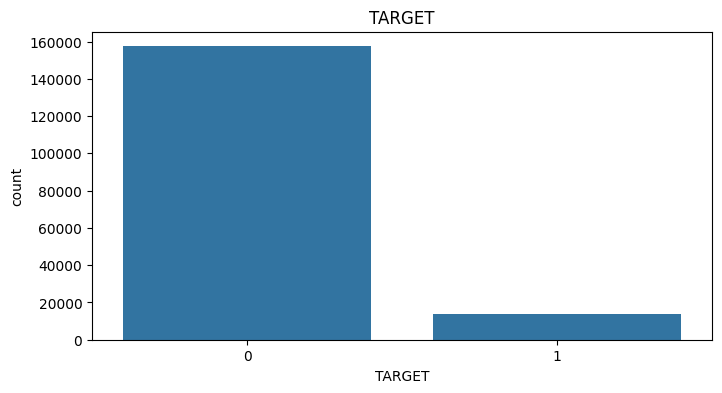

In [7]:
f,ax = plt.subplots(1,1,figsize = (8,4))
sns.countplot(x = "TARGET",data = df_)
ax.set_title("TARGET")
plt.show()

명목형 데이터 특성 개수 : 11


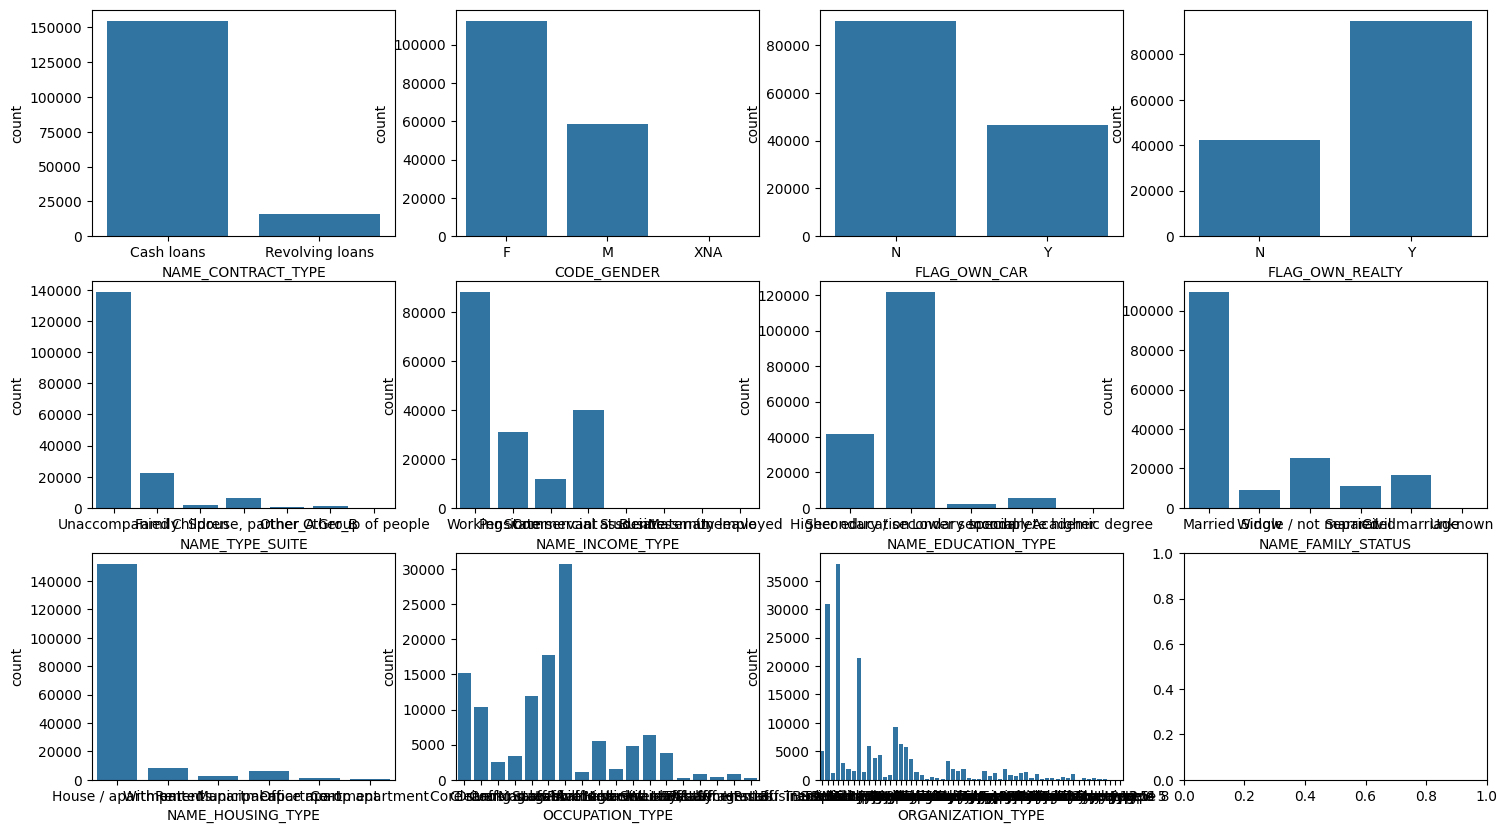

In [69]:
strarray = df_.select_dtypes("object").columns
print("명목형 데이터 특성 개수 : {}".format(len(strarray)))

fig , ax = plt.subplots(3 , 4 , figsize = (18 , 10))

for i in range(11):
    row = i // 4
    col = i % 4

    sns.countplot(data = df_ , x = df_[strarray[i]] , ax = ax[row][col])
    ax[row][col].set_title("".format(str(strarray[i])))
plt.show()

명목형 데이터 특성 개수 : 11


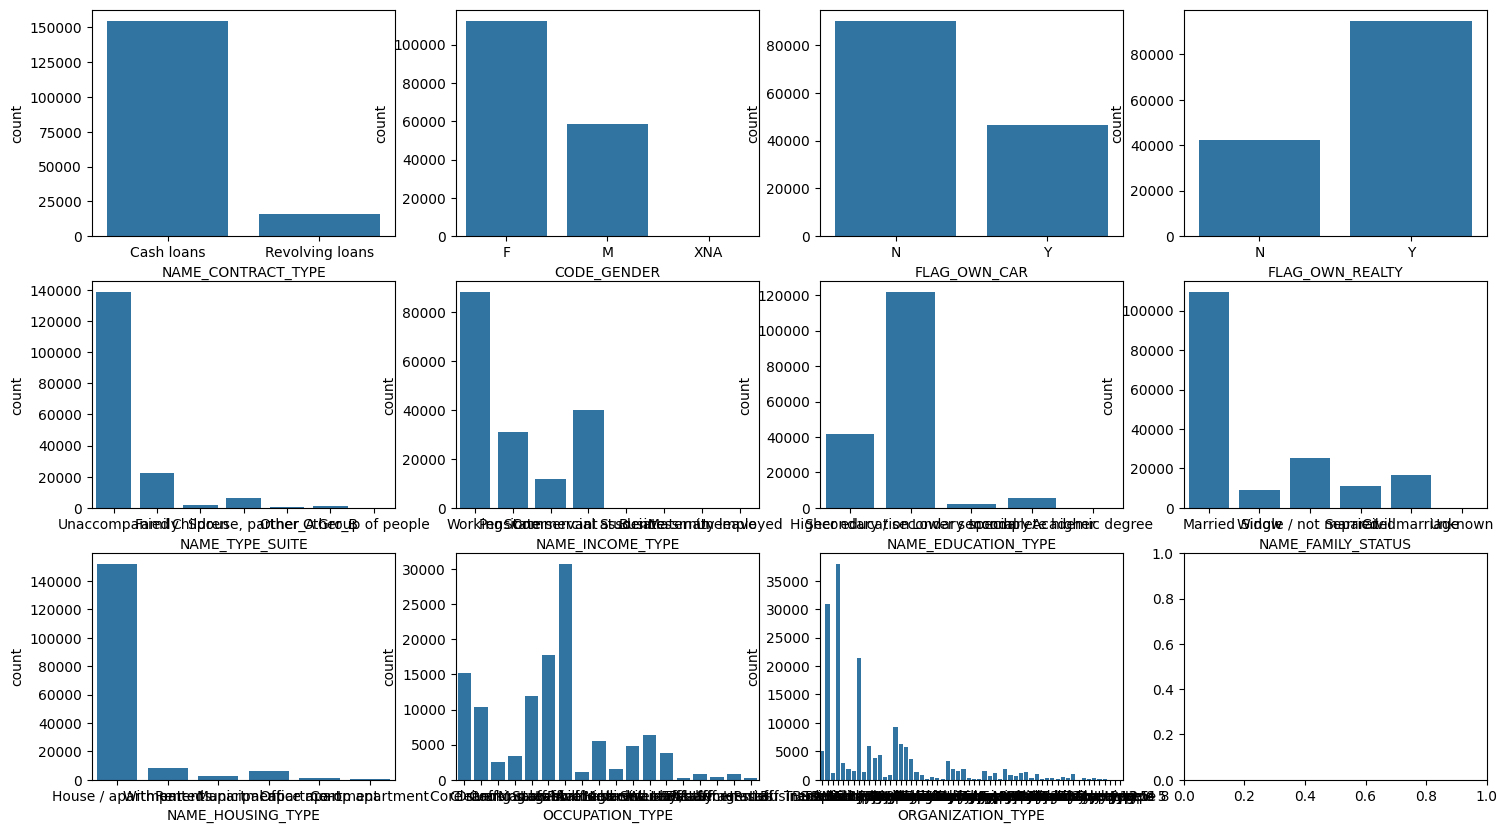

In [70]:
strarray = df_.select_dtypes("object").columns
print("명목형 데이터 특성 개수 : {}".format(len(strarray)))

fig , ax = plt.subplots(3 , 4 , figsize = (18 , 10))

for i in range(11):
    row = i // 4
    col = i % 4

    sns.countplot(data = df_ , x = df_[strarray[i]] , ax = ax[row][col])
    ax[row][col].set_title("".format(str(strarray[i])))
plt.show()

In [23]:
dfnum = df.copy()
strarray = df_.select_dtypes("object").columns
dfnum.drop(strarray,axis = 1,inplace=True)
dfnum.drop("SK_ID_CURR",axis = 1,inplace=True)
dfnum.head()

,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,...,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0,112500.0,755190.0,36328.5,675000.0,0.010032,-9233,-878,-333.0,...,NaN,0.0,0.0,0.0,0.0,-292.0,NaN,NaN,NaN,NaN
1,0,0,225000.0,585000.0,16893.0,585000.0,0.008019,-20148,365243,-4469.0,...,0.553165,0.0,0.0,0.0,0.0,-617.0,0.0,0.0,0.0,1.0
2,0,0,54000.0,334152.0,18256.5,270000.0,0.004960,-18496,-523,-3640.0,...,NaN,4.0,0.0,4.0,0.0,-542.0,NaN,NaN,NaN,NaN
3,0,0,67500.0,152820.0,8901.0,135000.0,0.005002,-24177,365243,-4950.0,...,0.767523,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0,157500.0,271066.5,21546.0,234000.0,0.006296,-10685,-697,-5101.0,...,0.669057,0.0,0.0,0.0,0.0,-1243.0,0.0,0.0,0.0,4.0


<Axes: >

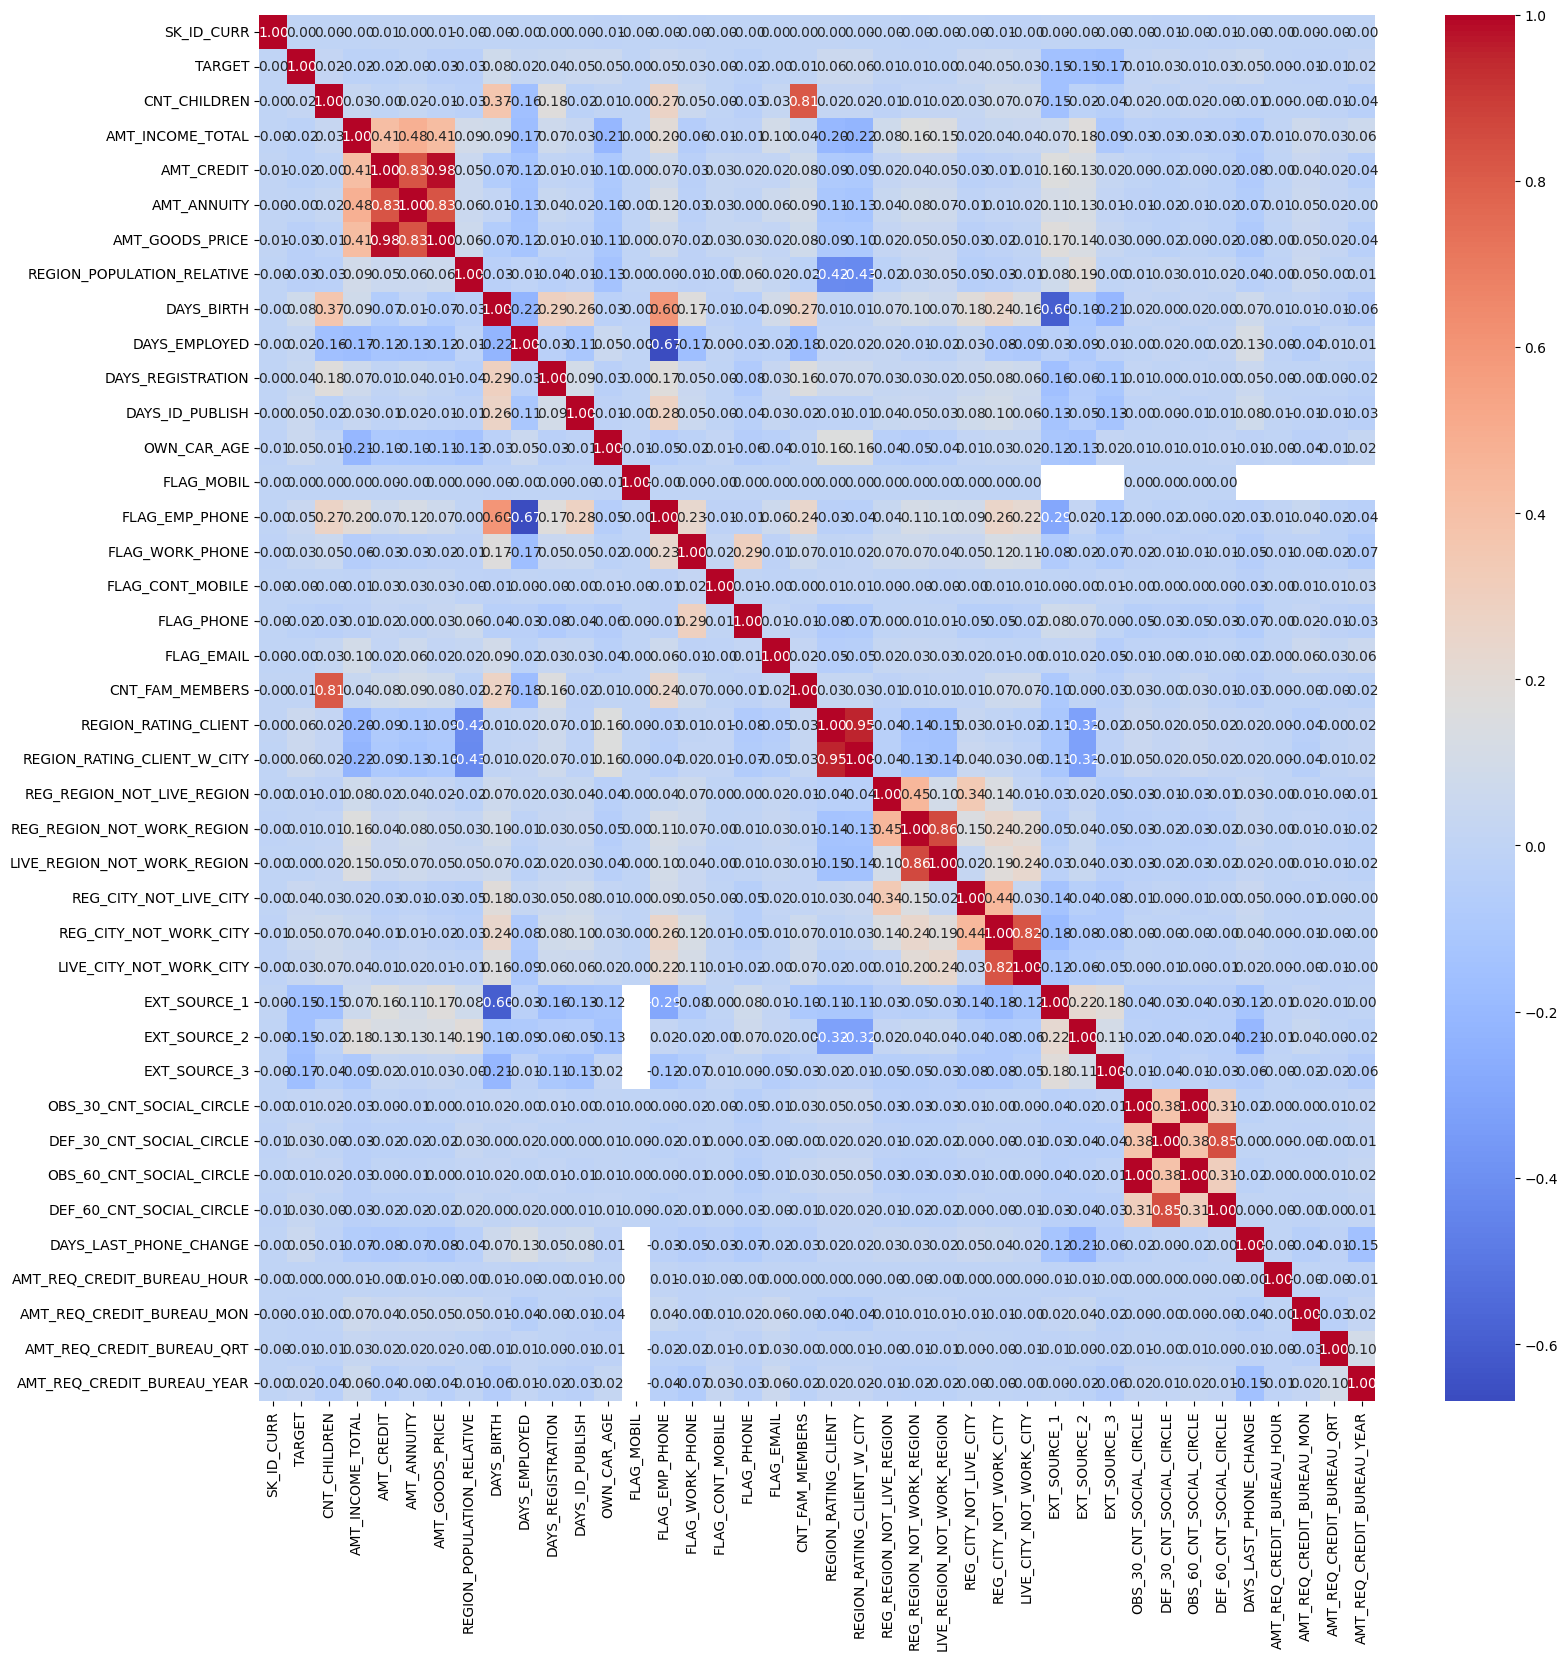

In [26]:

plt.figure(figsize=(18, 18))

sns.heatmap(data = df_.select_dtypes(['int' , 'float']).corr('spearman') ,
            annot = True ,
            fmt = '.2f' ,
            
            cmap = 'coolwarm')

In [49]:
strarray = df_.select_dtypes("object").columns
len(strarray)


11

In [5]:
df_['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df_["DEF_60_CNT_SOCIAL_CIRCLE"].mode().iloc[0], inplace=True)
df_['AMT_GOODS_PRICE'].fillna(df_['AMT_GOODS_PRICE'].mode().iloc[0], inplace=True)
df_['AMT_ANNUITY'].fillna(df_['AMT_ANNUITY'].mode().iloc[0], inplace=True)
test['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(test["DEF_60_CNT_SOCIAL_CIRCLE"].mode().iloc[0], inplace=True)
test['AMT_GOODS_PRICE'].fillna(test['AMT_GOODS_PRICE'].mode().iloc[0], inplace=True)
test['AMT_ANNUITY'].fillna(test['AMT_ANNUITY'].mode().iloc[0], inplace=True)


In [6]:
# 特徴量作成
df_['DAYS_BIRTH'] = df_['DAYS_BIRTH']//-360
# # 年齢を5歳ごとにラベリング（20から71までの範囲）
bins = range(20, 76, 5)  # 20から75まで5刻みのビンを作成
labels = list(range(1, len(bins)))  # 各ビンに対する数値ラベルを作成
df_['age_group'] = pd.cut(df_['DAYS_BIRTH'], bins=bins, labels=labels, right=False)

df_['EXT_23_mean'] = (df_['EXT_SOURCE_2'] + df_['EXT_SOURCE_3']) / 2
df_['EXT_12_mean'] = (df_['EXT_SOURCE_1'] + df_['EXT_SOURCE_2']) / 2
df_['EXT_13_mean'] = (df_['EXT_SOURCE_1'] + df_['EXT_SOURCE_3']) / 2
df_['EXT_123_mean'] = (df_['EXT_SOURCE_1'] + df_['EXT_SOURCE_2'] + df_['EXT_SOURCE_3']) / 3

# 勤続日数/年齢日数
df_['DAYS_EMPLOYED_PERC'] = df_['DAYS_EMPLOYED'] / df_['DAYS_BIRTH']
# # 総収入/借入額
df_['INCOME_CREDIT_PERC'] = df_['AMT_INCOME_TOTAL'] / df_['AMT_CREDIT']
# # 総収入/家族人数
df_['INCOME_PER_PERSON'] = df_['AMT_INCOME_TOTAL'] / df_['CNT_FAM_MEMBERS']
# # 月々の返済額/総収入
df_['ANNUITY_INCOME_PERC'] = df_['AMT_ANNUITY'] / df_['AMT_INCOME_TOTAL']
# # 月々の返済額/借入額
df_['PAYMENT_RATE'] = df_['AMT_ANNUITY'] / df_['AMT_CREDIT']

In [7]:
test['DAYS_BIRTH'] = test['DAYS_BIRTH']//-360
# # 年齢を5歳ごとにラベリング（20から71までの範囲）
bins = range(20, 76, 5)  # 20から75まで5刻みのビンを作成
labels = list(range(1, len(bins)))  # 各ビンに対する数値ラベルを作成
test['age_group'] = pd.cut(test['DAYS_BIRTH'], bins=bins, labels=labels, right=False)

test['EXT_23_mean'] = (test['EXT_SOURCE_2'] + test['EXT_SOURCE_3']) / 2
test['EXT_12_mean'] = (test['EXT_SOURCE_1'] + test['EXT_SOURCE_2']) / 2
test['EXT_13_mean'] = (test['EXT_SOURCE_1'] + test['EXT_SOURCE_3']) / 2
test['EXT_123_mean'] = (test['EXT_SOURCE_1'] + test['EXT_SOURCE_2'] + test['EXT_SOURCE_3']) / 3

# 勤続日数/年齢日数
test['DAYS_EMPLOYED_PERC'] = test['DAYS_EMPLOYED'] / test['DAYS_BIRTH']
# # 総収入/借入額
test['INCOME_CREDIT_PERC'] = test['AMT_INCOME_TOTAL'] / test['AMT_CREDIT']
# # 総収入/家族人数
test['INCOME_PER_PERSON'] = test['AMT_INCOME_TOTAL'] / test['CNT_FAM_MEMBERS']
# # 月々の返済額/総収入
test['ANNUITY_INCOME_PERC'] = test['AMT_ANNUITY'] / test['AMT_INCOME_TOTAL']
# # 月々の返済額/借入額
test['PAYMENT_RATE'] = test['AMT_ANNUITY'] / test['AMT_CREDIT']

In [8]:
# 파생변수 생성
df_['DEF_30_CNT_SOCIAL_CIRCLE'] = df_['DEF_60_CNT_SOCIAL_CIRCLE'] / 2
df_['OBS_30_CNT_SOCIAL_CIRCLE'] = df_['OBS_60_CNT_SOCIAL_CIRCLE'] / 2
df_["AMT_Percentage"] = df_["AMT_ANNUITY"] +df_["AMT_GOODS_PRICE"]/ df_["AMT_CREDIT"]

test['DEF_30_CNT_SOCIAL_CIRCLE'] = test['DEF_60_CNT_SOCIAL_CIRCLE'] / 2
test['OBS_30_CNT_SOCIAL_CIRCLE'] = test['OBS_60_CNT_SOCIAL_CIRCLE'] / 2
test["AMT_Percentage"] = test["AMT_ANNUITY"] +test["AMT_GOODS_PRICE"]/ test["AMT_CREDIT"]

In [9]:
dropcolumns = ['OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',"CNT_CHILDREN","AMT_ANNUITY","AMT_GOODS_PRICE","AMT_CREDIT","REGION_RATING_CLIENT","REG_REGION_NOT_WORK_REGION","REG_CITY_NOT_WORK_CITY"]
df_.drop(dropcolumns,axis = 1,inplace=True)
test.drop(dropcolumns,axis = 1,inplace=True)

In [19]:
null_counts = df_.isnull().sum()

null_counts = null_counts[null_counts > 0]
print(null_counts)

FLAG_OWN_CAR                   34241
FLAG_OWN_REALTY                34241
NAME_TYPE_SUITE                  747
OWN_CAR_AGE                   112992
OCCUPATION_TYPE                53745
EXT_SOURCE_1                  118928
EXT_SOURCE_2                     369
EXT_SOURCE_3                   54586
AMT_REQ_CREDIT_BUREAU_HOUR     23116
AMT_REQ_CREDIT_BUREAU_MON      23116
AMT_REQ_CREDIT_BUREAU_QRT      23116
AMT_REQ_CREDIT_BUREAU_YEAR     23116
EXT_23_mean                    54809
EXT_12_mean                   119015
EXT_13_mean                   134980
EXT_123_mean                  135038
dtype: int64


In [10]:
df_['CNT_FAM_MEMBERS'].fillna(df_['CNT_FAM_MEMBERS'].mode().iloc[0], inplace=True)
df_['DAYS_LAST_PHONE_CHANGE'].fillna(df_['DAYS_LAST_PHONE_CHANGE'].mode().iloc[0], inplace=True)

# model without Nan

In [11]:
Ndf = df_.copy()
Ntest = test.copy()

In [12]:
Ndf = Ndf.dropna(axis=1)
Ntest = Ntest.dropna(axis = 1)

In [60]:
Ndf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171202 entries, 0 to 171201
Data columns (total 31 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   171202 non-null  int64  
 1   TARGET                       171202 non-null  int64  
 2   NAME_CONTRACT_TYPE           171202 non-null  object 
 3   CODE_GENDER                  171202 non-null  object 
 4   AMT_INCOME_TOTAL             171202 non-null  float64
 5   NAME_INCOME_TYPE             171202 non-null  object 
 6   NAME_EDUCATION_TYPE          171202 non-null  object 
 7   NAME_FAMILY_STATUS           171202 non-null  object 
 8   NAME_HOUSING_TYPE            171202 non-null  object 
 9   REGION_POPULATION_RELATIVE   171202 non-null  float64
 10  DAYS_BIRTH                   171202 non-null  int64  
 11  DAYS_EMPLOYED                171202 non-null  int64  
 12  DAYS_REGISTRATION            171202 non-null  float64
 13 

In [61]:
Ntest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61500 entries, 0 to 61499
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SK_ID_CURR                   61500 non-null  int64  
 1   NAME_CONTRACT_TYPE           61500 non-null  object 
 2   CODE_GENDER                  61500 non-null  object 
 3   AMT_INCOME_TOTAL             61500 non-null  float64
 4   NAME_INCOME_TYPE             61500 non-null  object 
 5   NAME_EDUCATION_TYPE          61500 non-null  object 
 6   NAME_FAMILY_STATUS           61500 non-null  object 
 7   NAME_HOUSING_TYPE            61500 non-null  object 
 8   REGION_POPULATION_RELATIVE   61500 non-null  float64
 9   DAYS_BIRTH                   61500 non-null  int64  
 10  DAYS_EMPLOYED                61500 non-null  int64  
 11  DAYS_REGISTRATION            61500 non-null  float64
 12  DAYS_ID_PUBLISH              61500 non-null  int64  
 13  FLAG_MOBIL      

<Axes: >

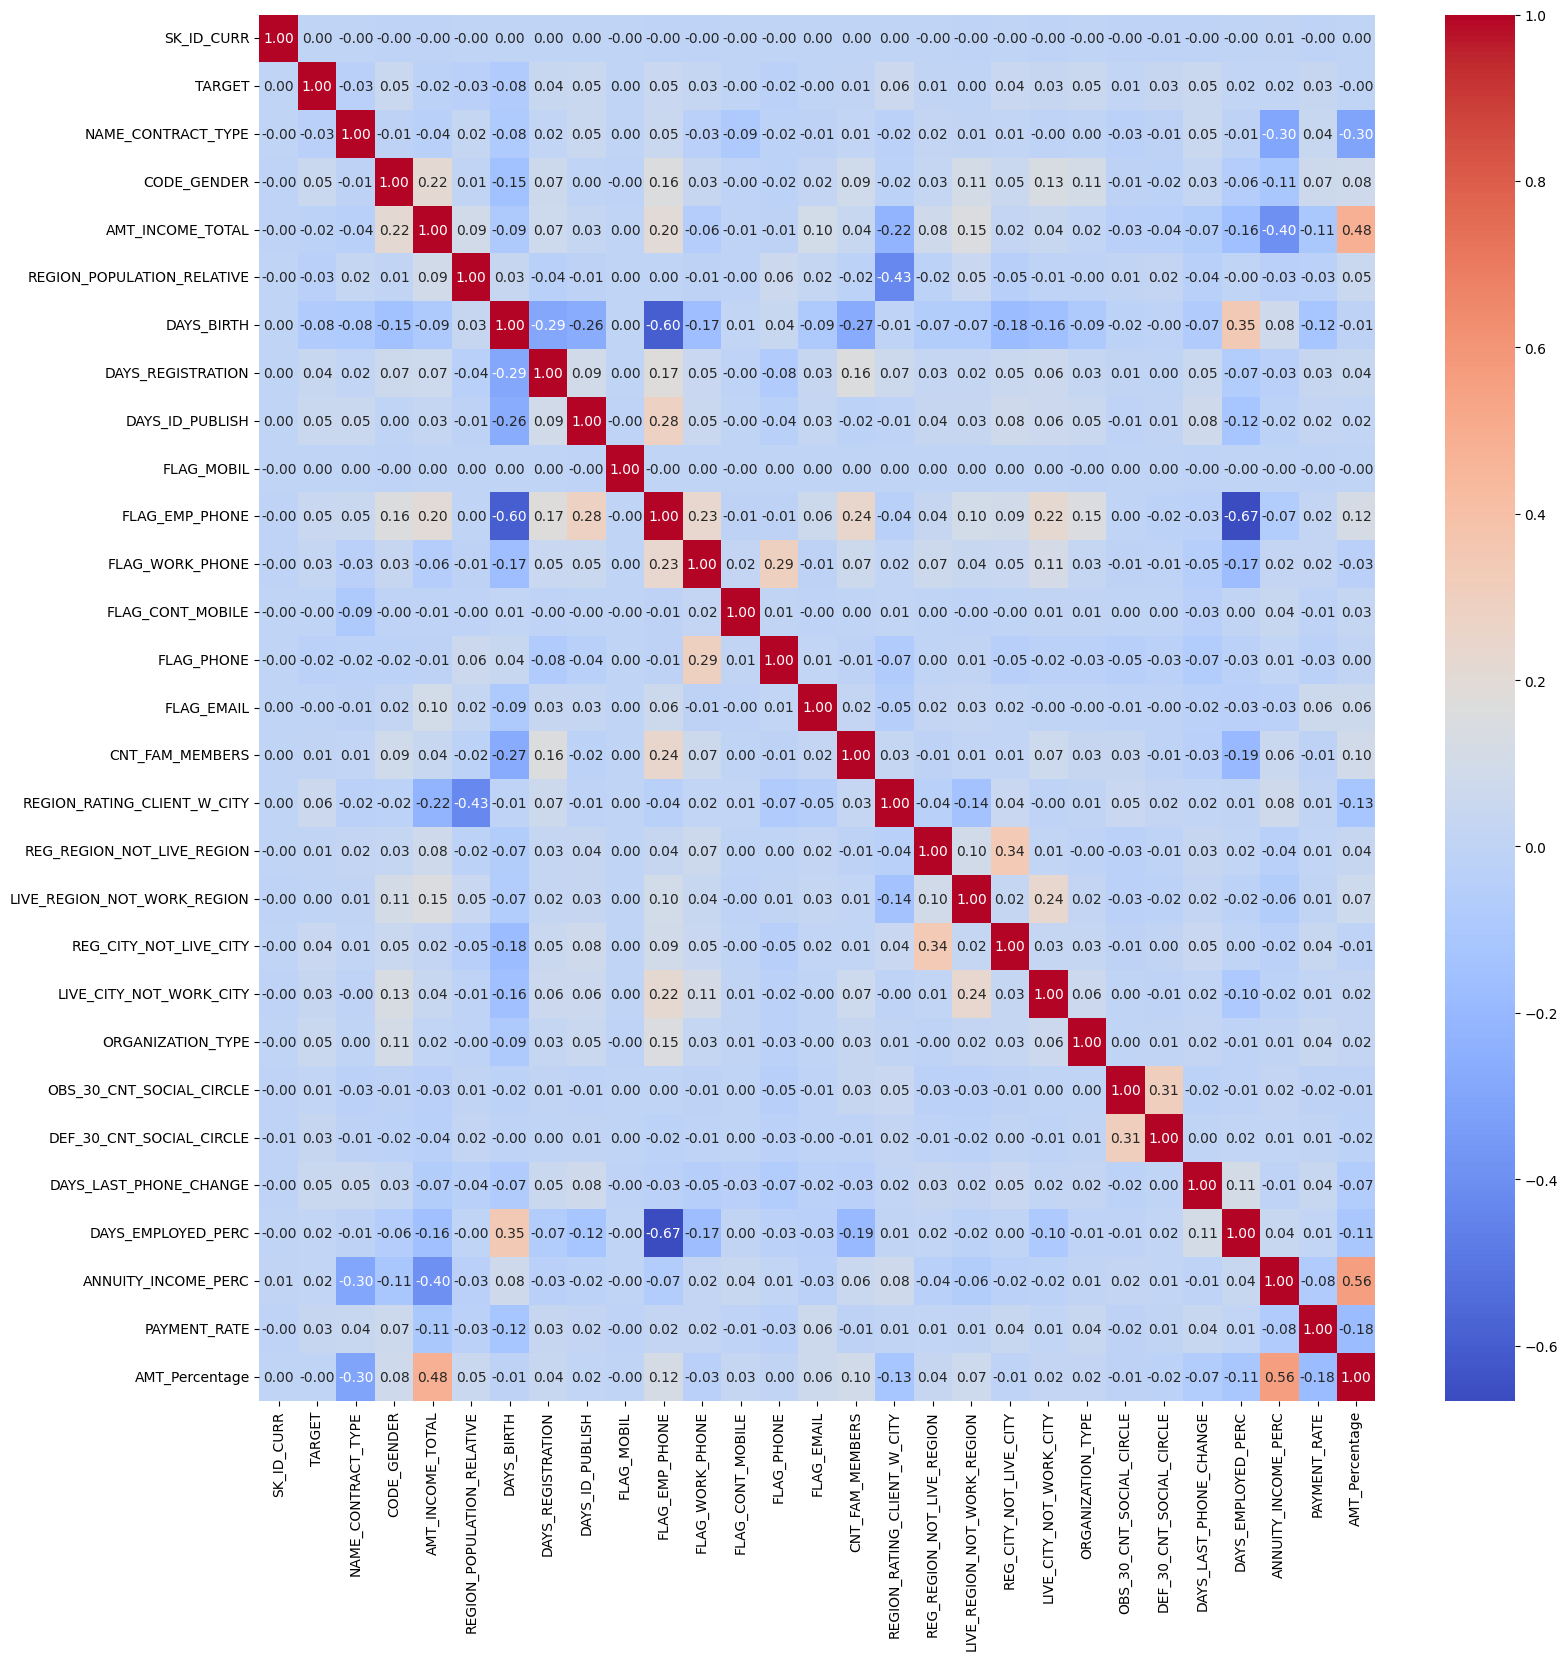

In [24]:

plt.figure(figsize=(18, 18))

sns.heatmap(data = Ndf.select_dtypes(['int' , 'float']).corr('spearman'),
            annot = True ,
            fmt = '.2f' ,
            
            cmap = 'coolwarm')

In [13]:
Ndf.drop(['DAYS_EMPLOYED',"INCOME_CREDIT_PERC"],axis =1,inplace = True)
Ntest.drop(['DAYS_EMPLOYED',"INCOME_CREDIT_PERC"],axis =1,inplace = True)

In [23]:
Ntest.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'age_group',
       'DAYS_EMPLOYED_PERC', 'INCOME_CREDIT_PERC', 'INCOME_PER_PERSON',
       'ANNUITY_INCOME_PERC', 'PAYMENT_RATE', 'AMT_Percentage'],
      dtype='object')

In [64]:
Ntest.columns

Index(['SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'CODE_GENDER', 'AMT_INCOME_TOTAL',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT_W_CITY',
       'REG_REGION_NOT_LIVE_REGION', 'LIVE_REGION_NOT_WORK_REGION',
       'REG_CITY_NOT_LIVE_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'OBS_30_CNT_SOCIAL_CIRCLE',
       'DEF_30_CNT_SOCIAL_CIRCLE', 'DAYS_LAST_PHONE_CHANGE', 'AMT_Percentage'],
      dtype='object')

명목형 데이터 특성 개수 : 7


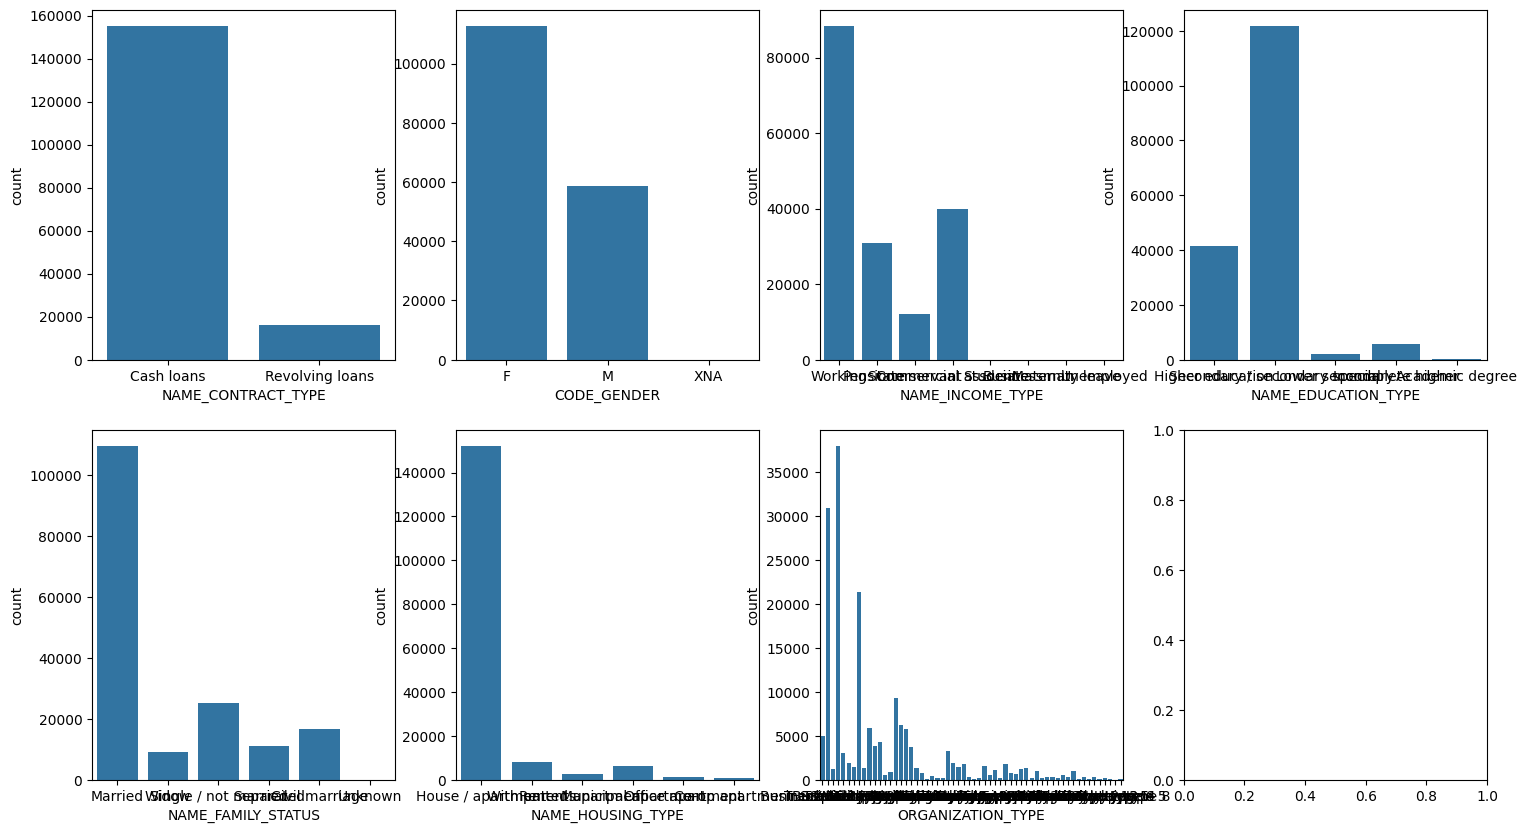

In [65]:
Nstrarray = Ndf.select_dtypes("object").columns
print("명목형 데이터 특성 개수 : {}".format(len(Nstrarray)))

fig , ax = plt.subplots(2 , 4 , figsize = (18 , 10))

for i in range(7):
    row = i // 4
    col = i % 4

    sns.countplot(data = Ndf, x = Ndf[Nstrarray[i]] , ax = ax[row][col])
    ax[row][col].set_title("".format(str(Nstrarray[i])))
plt.show()

명목형 데이터 특성 개수 : 7


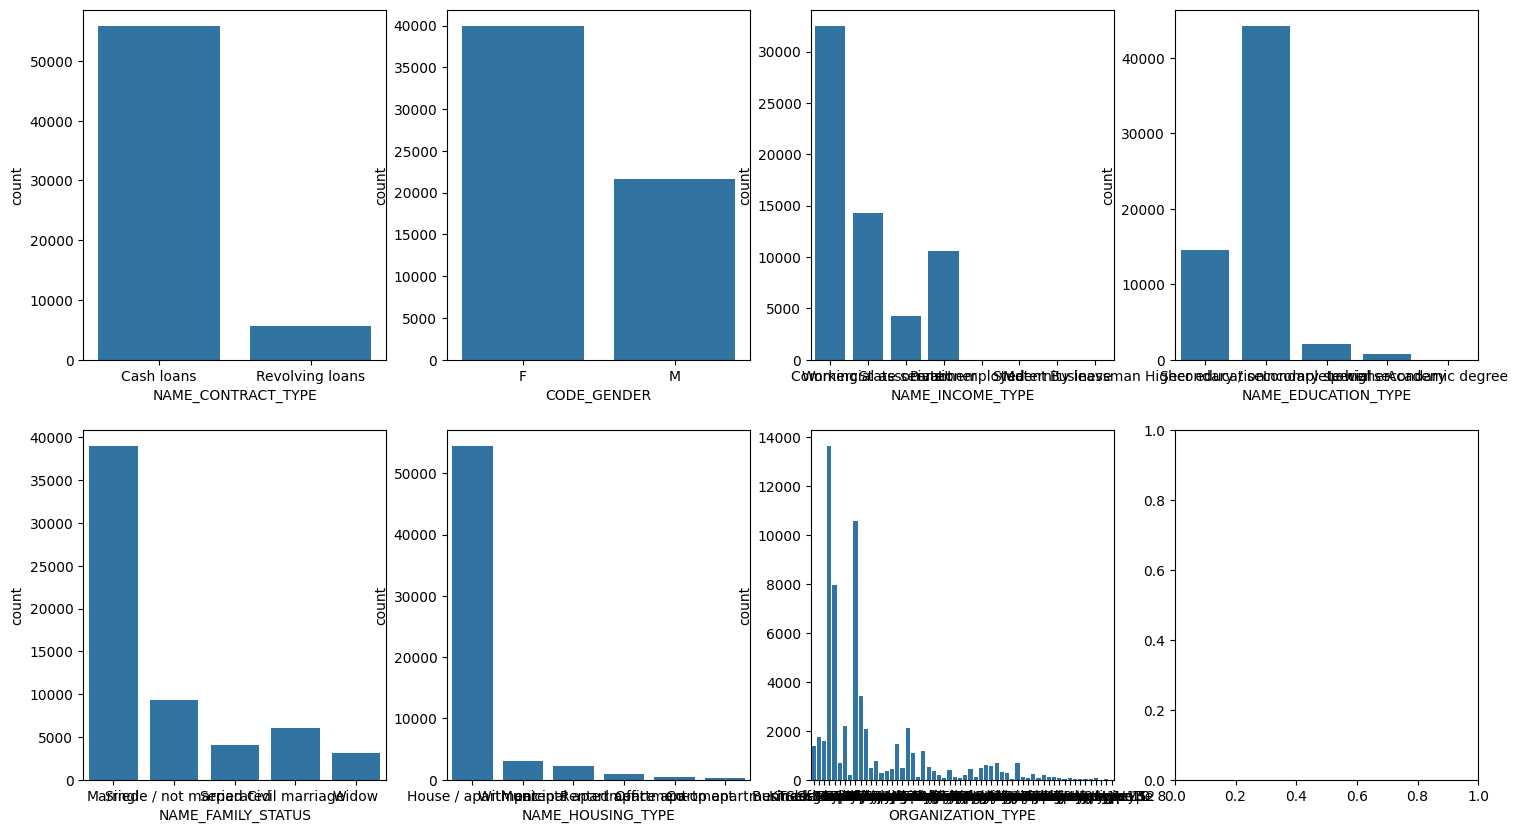

In [66]:
Nstrarray = Ntest.select_dtypes("object").columns
print("명목형 데이터 특성 개수 : {}".format(len(Nstrarray)))

fig , ax = plt.subplots(2 , 4 , figsize = (18 , 10))

for i in range(7):
    row = i // 4
    col = i % 4

    sns.countplot(data = Ntest, x = Ntest[Nstrarray[i]] , ax = ax[row][col])
    ax[row][col].set_title("".format(str(Nstrarray[i])))
plt.show()

In [90]:
print(Ndf["NAME_EDUCATION_TYPE"].unique())
print(Ntest["NAME_EDUCATION_TYPE"].unique())

['Higher education' 'Secondary / secondary special' 'Lower secondary'
 'Incomplete higher' 'Academic degree']
['Higher education' 'Secondary / secondary special' 'Incomplete higher'
 'Lower secondary' 'Academic degree']


In [91]:
print(Ndf["NAME_INCOME_TYPE"].unique())
print(Ntest["NAME_INCOME_TYPE"].unique())

['Working' 'Pensioner' 'State servant' 'Commercial associate' 'Student'
 'Businessman' 'Maternity leave' 'Unemployed']
['Working' 'Commercial associate' 'State servant' 'Pensioner' 'Unemployed'
 'Student' 'Maternity leave' 'Businessman']


In [92]:

print(Ndf["NAME_HOUSING_TYPE"].unique())
print(Ntest["NAME_HOUSING_TYPE"].unique())

['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
['House / apartment' 'With parents' 'Municipal apartment'
 'Rented apartment' 'Office apartment' 'Co-op apartment']


In [93]:

print(Ndf["NAME_HOUSING_TYPE"].unique())
print(Ntest["NAME_HOUSING_TYPE"].unique())

['House / apartment' 'With parents' 'Rented apartment'
 'Municipal apartment' 'Office apartment' 'Co-op apartment']
['House / apartment' 'With parents' 'Municipal apartment'
 'Rented apartment' 'Office apartment' 'Co-op apartment']


In [15]:
# CODE_GENDER
mode = Ndf["CODE_GENDER"].mode().iloc[0]
Ndf["CODE_GENDER"] = Ndf["CODE_GENDER"].replace('XNA', mode)

In [68]:
Ndf[Ndf["NAME_FAMILY_STATUS"] == "Unknown"]

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_Percentage
47453,47453,0,Revolving loans,F,202500.0,Commercial associate,Higher education,Unknown,House / apartment,0.031329,-12844,-232,-1597.0,-1571,1,1,0,1,0,0,2.0,2,0,0,0,0,Business Entity Type 2,0.5,0.0,-654.0,29250.769231
74592,74592,0,Revolving loans,M,450000.0,Commercial associate,Lower secondary,Unknown,Municipal apartment,0.015221,-12396,-1161,-3265.0,-4489,1,1,1,1,1,0,2.0,2,0,1,0,1,Insurance,1.5,0.0,-876.0,33750.666667


In [14]:
# NAME_FAMILY_STATUS
print(Ndf["NAME_FAMILY_STATUS"].unique())
print(Ntest["NAME_FAMILY_STATUS"].unique())
mode = Ndf["NAME_FAMILY_STATUS"].mode().iloc[0]
Ndf["NAME_FAMILY_STATUS"] = Ndf["NAME_FAMILY_STATUS"].replace('Unknown', mode)

['Married' 'Widow' 'Single / not married' 'Separated' 'Civil marriage'
 'Unknown']
['Married' 'Single / not married' 'Separated' 'Civil marriage' 'Widow']


In [16]:
# ORGANIZATION_TYPE
mode = Ndf["ORGANIZATION_TYPE"].mode().iloc[0]
Ndf["ORGANIZATION_TYPE"] = Ndf["ORGANIZATION_TYPE"].replace('XNA', mode)

Tmode = Ntest["ORGANIZATION_TYPE"].mode().iloc[0]
Ntest["ORGANIZATION_TYPE"] = Ntest["ORGANIZATION_TYPE"].replace('XNA', Tmode)

In [17]:
#2
E = LabelEncoder()
Larray = ["NAME_CONTRACT_TYPE","CODE_GENDER"]
for i in range(2):
    Labeled = E.fit_transform(Ndf[Larray[i]])
    Ndf[Larray[i]] = Labeled
    testLabeled = E.fit_transform(Ntest[Larray[i]])
    Ntest[Larray[i]] = testLabeled
    

In [18]:
# some
ColumnsOneHot = ["NAME_INCOME_TYPE","NAME_EDUCATION_TYPE","NAME_FAMILY_STATUS","NAME_HOUSING_TYPE"]
encoder = OneHotEncoder(sparse_output = False)

Ndf_encoded = pd.get_dummies(Ndf[ColumnsOneHot])

Ndf.drop(columns=ColumnsOneHot, inplace=True)
Ndf = pd.concat([Ndf, Ndf_encoded], axis=1)

Ntest_encoded = pd.get_dummies(Ntest[ColumnsOneHot])

Ntest.drop(columns=ColumnsOneHot, inplace=True)
Ntest = pd.concat([Ntest, Ntest_encoded], axis=1)

In [19]:
# too many
col = Ndf["ORGANIZATION_TYPE"]

encoder = TargetEncoder()
Ndf["ORGANIZATION_TYPE"] = encoder.fit_transform(Ndf["ORGANIZATION_TYPE"] ,Ndf["TARGET"] )
Ntest["ORGANIZATION_TYPE"] = encoder.transform(Ntest["ORGANIZATION_TYPE"])

In [19]:
Ndf.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,AMT_INCOME_TOTAL,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,...,NAME_FAMILY_STATUS_Married,NAME_FAMILY_STATUS_Separated,NAME_FAMILY_STATUS_Single / not married,NAME_FAMILY_STATUS_Widow,NAME_HOUSING_TYPE_Co-op apartment,NAME_HOUSING_TYPE_House / apartment,NAME_HOUSING_TYPE_Municipal apartment,NAME_HOUSING_TYPE_Office apartment,NAME_HOUSING_TYPE_Rented apartment,NAME_HOUSING_TYPE_With parents
0,0,0,0,0,112500.0,0.010032,-9233,-878,-333.0,-522,...,True,False,False,False,False,True,False,False,False,False
1,1,0,0,0,225000.0,0.008019,-20148,365243,-4469.0,-3436,...,True,False,False,False,False,True,False,False,False,False
2,2,0,0,0,54000.0,0.004960,-18496,-523,-3640.0,-2050,...,True,False,False,False,False,True,False,False,False,False
3,3,0,0,0,67500.0,0.005002,-24177,365243,-4950.0,-3951,...,False,False,False,True,False,True,False,False,False,False
4,4,1,0,1,157500.0,0.006296,-10685,-697,-5101.0,-3226,...,True,False,False,False,False,False,False,False,False,True


In [20]:
columns = list(Ndf.columns)
columns.remove('TARGET')
columns.remove('SK_ID_CURR')

In [21]:
Ntest.columns
columns

['NAME_CONTRACT_TYPE',
 'CODE_GENDER',
 'AMT_INCOME_TOTAL',
 'REGION_POPULATION_RELATIVE',
 'DAYS_BIRTH',
 'DAYS_EMPLOYED',
 'DAYS_REGISTRATION',
 'DAYS_ID_PUBLISH',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'REGION_RATING_CLIENT',
 'REGION_RATING_CLIENT_W_CITY',
 'REG_REGION_NOT_LIVE_REGION',
 'REG_REGION_NOT_WORK_REGION',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'ORGANIZATION_TYPE',
 'NAME_INCOME_TYPE_Businessman',
 'NAME_INCOME_TYPE_Commercial associate',
 'NAME_INCOME_TYPE_Maternity leave',
 'NAME_INCOME_TYPE_Pensioner',
 'NAME_INCOME_TYPE_State servant',
 'NAME_INCOME_TYPE_Student',
 'NAME_INCOME_TYPE_Unemployed',
 'NAME_INCOME_TYPE_Working',
 'NAME_EDUCATION_TYPE_Academic degree',
 'NAME_EDUCATION_TYPE_Higher education',
 'NAME_EDUCATION_TYPE_Incomplete higher',
 'NAME_EDUCATION_TYPE_Lower secondary',
 'NAME_EDUCATION_TYPE_Secondary / secondary

In [21]:

X = Ndf[columns]
Y = Ndf["TARGET"]
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
Test_X = Ntest[columns]
Test_X = scaler.transform(Test_X)

# Oversampling
smote = SMOTE(random_state=42)
X_res_smote, y_res_smote = smote.fit_resample(X, Y)
df_res_smote = pd.DataFrame(X_res_smote, columns= columns)
df_res_smote['price_range'] = y_res_smote

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [23]:
et  = ExtraTreesClassifier()
et.fit(X_train, y_train)

et_train_pred = et.predict_proba(X_train)[:, 1]
et_valid_pred = et.predict_proba(X_test)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, et_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_test, et_valid_pred)}")


Train Score: 1.0
Valid Score: 0.6326591018551754


In [37]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)

lr_train_pred = lr.predict_proba(X_train)[:, 1]
lr_valid_pred = lr.predict_proba(X_test)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lr_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_test, lr_valid_pred)}")

Train Score: 0.6633139849938119
Valid Score: 0.660355972865276


In [38]:
mlp = MLPClassifier(random_state=0)
mlp.fit(X_train, y_train)

MLPClassifier(random_state=0)

In [39]:
mlp_train_pred = mlp.predict_proba(X_train)[:, 1]
mlp_valid_pred = mlp.predict_proba(X_test)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, mlp_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_test, mlp_valid_pred)}")

Train Score: 0.7422391718802326
Valid Score: 0.6489894564422252


In [44]:
from sklearn.metrics import accuracy_score

In [40]:
def objective(trial : optuna.Trial):
    
    # ハイパーパラメータの提案
    n_estimators = trial.suggest_int('n_estimators', 50, 200)
    max_depth = trial.suggest_int('max_depth', 3, 10)
    learning_rate = trial.suggest_loguniform('learning_rate', 1e-3, 1e-1)
    subsample = trial.suggest_uniform('subsample', 0.5, 1.0)
    min_samples_split = trial.suggest_int('min_samples_split', 2, 20)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 20)


    model = GradientBoostingClassifier(
        n_estimators=n_estimators,
        max_depth=max_depth,
        learning_rate=learning_rate,
        subsample=subsample,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )

    model.fit(X_train, y_train)

    
    y_pred_train = model.predict(X_train)
    y_pred_valid = model.predict(X_test)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_valid = accuracy_score(y_test, y_pred_valid)
    print(accuracy_train)
    print(accuracy_valid)
    
    return accuracy_valid


In [41]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=10)

[I 2024-06-29 20:15:29,658] A new study created in memory with name: no-name-a311b829-10a6-47e0-83b3-730e5ba2011c
[W 2024-06-29 20:15:33,113] Trial 0 failed with parameters: {'n_estimators': 171, 'max_depth': 4, 'learning_rate': 0.006127544142084495, 'subsample': 0.6959785190638318, 'min_samples_split': 20, 'min_samples_leaf': 3} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\abeta\anaconda3\envs\forcompe\Lib\site-packages\optuna\study\_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "C:\Users\abeta\AppData\Local\Temp\ipykernel_9972\3168908172.py", line 22, in objective
    model.fit(X_train, y_train)
  File "c:\Users\abeta\anaconda3\envs\forcompe\Lib\site-packages\sklearn\base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\abeta\anaconda3\envs\forcompe\Lib\site-package

KeyboardInterrupt: 

In [42]:
GBC = GradientBoostingClassifier(max_depth = 4,subsample = 0.5374697790412601,min_samples_leaf= 20)
GBC.fit(X_train, y_train)
GBC_train_pred = GBC.predict_proba(X_train)[:, 1]
GBC_valid_pred = GBC.predict_proba(X_test)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, GBC_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_test, GBC_valid_pred)}")

Train Score: 0.7391407667781708
Valid Score: 0.7070397274714091


In [43]:
RFC = RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_train_pred = RFC.predict_proba(X_train)[:, 1]
RFC_valid_pred = RFC.predict_proba(X_test)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, RFC_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_test, RFC_valid_pred)}")

Train Score: 1.0
Valid Score: 0.6570837895922975


In [44]:
# LGBMClassifier
from lightgbm import LGBMClassifier

lgb = LGBMClassifier(random_state=0)
lgb.fit(X_train, y_train)

lgb_train_pred = lgb.predict_proba(X_train)[:, 1]
lgb_valid_pred = lgb.predict_proba(X_test)[:, 1]
print(f"Train Score: {roc_auc_score(y_train, lgb_train_pred)}")
print(f"Valid Score: {roc_auc_score(y_test, lgb_valid_pred)}")

[LightGBM] [Info] Number of positive: 11021, number of negative: 125940
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007267 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2507
[LightGBM] [Info] Number of data points in the train set: 136961, number of used features: 48
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.080468 -> initscore=-2.436003
[LightGBM] [Info] Start training from score -2.436003
Train Score: 0.7864176053549408
Valid Score: 0.7068900366673179


In [50]:
pred = .predict_proba(Test_X)[:, 1]
sample_sub['TARGET'] = pred
sample_sub

,SK_ID_CURR,TARGET
0,171202,0.178647
1,171203,0.397098
2,171204,0.646411
3,171205,0.157429
4,171206,0.473115
...,...,...
61495,232697,0.235028
61496,232698,0.210062
61497,232699,0.429563
61498,232700,0.250052


In [51]:
sample_sub.to_csv("GBC.csv", index=False)


# ORGANIZATION_TYPE

# model

In [54]:
kfold = StratifiedKFold(n_splits = 10)
random_state = 42
classifiers = []
classifiers.append(SVC(random_state = random_state))
classifiers.append(DecisionTreeClassifier(random_state = random_state))
classifiers.append(AdaBoostClassifier(random_state = random_state))
classifiers.append(RandomForestClassifier(random_state = random_state))
classifiers.append(ExtraTreesClassifier(random_state = random_state))
classifiers.append(GradientBoostingClassifier(random_state = random_state))
classifiers.append(MLPClassifier(random_state = random_state))
classifiers.append(KNeighborsClassifier())
classifiers.append(LogisticRegression(random_state = random_state))

cv_results = []
for classifier in classifiers:
    cv_results.append(cross_val_score(classifier , X_train , y = y_train , scoring = 'accuracy' , cv = kfold , n_jobs = 4))

cv_means = []
cv_std = []

for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({
    "CrossValMeans" : cv_means ,
    "CrossValerrors" : cv_std ,
    "Algorithm" : [
        'SVC' , 'DecisionTree' , 'AdaBoost' , 'RandomForest' , 'ExtraTrees' , 'GradientBoosting' ,
        'MultipleLayerPerceptron' , 'KNeighboors' , 'LogisticRegression'
    ]
})

g = sns.barplot(x = 'CrossValMeans' , y = 'Algorithm' , data = cv_res , palette = 'Set3' , orient = 'h' , **{'xerr' : cv_std})
plt.xlabel('Mean Accuracy')
plt.title('Cross validation scores')

KeyboardInterrupt: 

In [ ]:
# heatmap
#smote
#parameter tuning